## Home and work location mapping 
The purpose of this notebook is to map the  home and work locations for the users that passed qc. Specifically we want to map: 

1) All the home locations of users in Bogota 
2) All the work locations of the users in Bogota
3) All the home and work locations of the users that live near the stations

In [1]:
from dotenv import load_dotenv
load_dotenv()

from plotting import * 
from preprocess import *

import pandas as pd 

# Access environment variables and define other necessary variables
data_dir = os.getenv('WORKING_DIR')
meta_dir = f'{data_dir}metadata/'
pq_dir = f'{data_dir}data/parquet/in_study_area/pass_qc/'
out_dir_hw = f'{data_dir}data/home_work/'


### Load the pings data and map each users' home location

Load 1. the shapefile with the ZAT and stratum information and 2. the user stats to get the list of users. 
Note that there are 701961 users that passed qc.

,uid,min_day,max_day,pings,daysActive,daysSpanned,pingsPerDay,avg
0,000a7743-1dd9-4a98-b902-9e681b7a33c7,2019-03-28 00:00:00-05:00,2019-08-31 00:00:00-05:00,2086,144,156,"[23, 6, 18, 33, 2, 58, 53, 77, 45, 62, 30, 29,...",14.486111
1,0015c3e5-dd4d-4198-954e-bdc5f225f29a,2019-03-31 00:00:00-05:00,2019-08-31 00:00:00-05:00,421,59,153,"[1, 5, 6, 3, 2, 2, 7, 3, 5, 8, 4, 1, 3, 2, 7, ...",7.135593
2,0016a88e-c934-4e67-bb9f-d0d6282aa9ea,2019-05-09 00:00:00-05:00,2019-08-04 00:00:00-05:00,123,20,87,"[1, 2, 9, 1, 1, 6, 2, 4, 5, 1, 1, 31, 43, 6, 2...",6.150000
3,0020aadf-097e-47e7-b66b-163eebae1b43,2019-05-31 00:00:00-05:00,2019-08-31 00:00:00-05:00,2347,84,92,"[21, 75, 28, 24, 13, 4, 10, 12, 5, 2, 29, 5, 1...",27.940476
4,002f09fc-f6c9-4144-a8d6-e5caec2afacd,2019-03-30 00:00:00-05:00,2019-08-31 00:00:00-05:00,364,71,154,"[2, 3, 2, 2, 1, 1, 3, 2, 1, 6, 3, 1, 2, 3, 31,...",5.126761


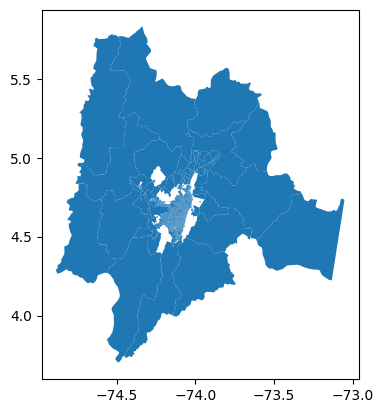

In [2]:
shp_name_zat = 'zat_stratum'
shapefile_zat = f'{meta_dir}income/{shp_name_zat}.shp'
regions_gdf_zat = gpd.read_file(shapefile_zat)
regions_gdf_zat.plot()

output_filepath = f'{data_dir}/data/user_stats/user_stats_2019_months1-8_60min_pings_10min_days_shp_filtered.csv'
user_stats_filtered = pd.read_csv(output_filepath)
uids_pass_qc= list(user_stats_filtered['uid'])
user_stats_filtered.head()

In [3]:
out_dir = f'{pq_dir}home_locs/'
cols = ['uid', 'datetime', 'lat', 'lng']
gdf_cols = ['Area', 'MUNCod', 'NOMMun', 'ZAT', 'UTAM', 'stratum']

compute_home_lat_lngs_for_users(uids_pass_qc=uids_pass_qc, regions_gdf=regions_gdf_zat, pq_dir=pq_dir, 
                                out_dir=out_dir, num_users=50000, cols = ['uid', 'datetime', 'lat', 'lng'], 
                                gdf_cols=['Area', 'MUNCod', 'NOMMun', 'ZAT', 'UTAM', 'stratum'])

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

home_locs_for_0_50000_passqc_users


home_locs_for_50000_100000_passqc_users


home_locs_for_100000_150000_passqc_users


home_locs_for_150000_200000_passqc_users


home_locs_for_200000_250000_passqc_users


home_locs_for_250000_300000_passqc_users


home_locs_for_300000_350000_passqc_users


home_locs_for_350000_400000_passqc_users


home_locs_for_400000_450000_passqc_users


home_locs_for_450000_500000_passqc_users


home_locs_for_500000_550000_passqc_users


home_locs_for_550000_600000_passqc_users


home_locs_for_600000_650000_passqc_users


home_locs_for_650000_700000_passqc_users






































































100%|██████████| 1961/1961 [00:03<00:00, 539.42it/s]
/var/folders/ft/vp1_qbbs5lq2n2w83zpv4fz80000gn/T/ipykernel_67411/1487213385.py:5: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  compute_home_lat_lngs_for_users(uids_pass_qc=uids_pass_qc, regions_gdf=regions_gdf_zat, pq_dir=pq_dir,


home_locs_for_700000_750000_passqc_users


### Merge the home locs from all users to find those that live in the zats of interest 

#### Combine the data for all the users
Read in the home locs files with the home locations of all the users (lat, lng, ZAT) that we just wrote to get the uids of those users that live in those areas

In [25]:
home_locs_files = glob.glob(out_dir + '*.parquet')
all_home_locs_filepath = f'{out_dir}all_home_locs_2200_0600_w_zats_for_users_pass_qc.csv'
hl_df = ds.dataset(home_locs_files, format="parquet").to_table().to_pandas()
hl_df = hl_df.rename(columns={'lat': 'lat_home', 'lng': 'lng_home', 'ZAT': 'ZAT_home', 'UTAM': 'UTAM_home'})
hl_df.to_csv(all_home_locs_filepath)
hl_df.head()

,uid,lat_home,lng_home,Area,MUNCod,NOMMun,ZAT_home,UTAM_home,stratum
0,00000cd1-8691-4a18-94a1-7dbe4009fc52,4.723899,-74.053436,348781.441245,11001.0,Bogotá,68.0,UTAM19,3.022882
1,0000c13b-0a5e-4263-b052-ee88ff1afafe,4.714957,-74.109375,792958.853788,11001.0,Bogotá,120.0,UTAM72,2.919886
2,0001235e-555f-4517-b93d-619b44af524c,4.760563,-74.038704,910584.408029,11001.0,Bogotá,11.0,UTAM9,2.896025
3,00018547-7b58-430f-bbc1-e94c40d70d20,4.616856,-74.125923,348375.380319,11001.0,Bogotá,424.0,UTAM43,2.980392
4,0001c25c-024d-463f-91c8-b06a82b880dd,4.615494,-74.150719,167283.685880,11001.0,Bogotá,521.0,UTAM45,2.993973


#### Read in zats file 
This file specifies the treatment and control zats. Make sure that the ZATs are the same data type in the `hl_df` and the `zats_tc` dataframes for proper filtering.

In [57]:
import numpy as np 

zats_tc_fp = f'{meta_dir}ZAT_treat_control.csv'
print(hl_df.ZAT_home.dtypes)
zats_tc = pd.read_csv(zats_tc_fp).astype('float64') 

ztreat = [i for i in list(zats_tc['ZATs Treatment group']) if str(i) != "nan"] 
zcontrol = [i for i in list(zats_tc['ZAT Control group']) if str(i) != "nan"] 
zsel = ztreat + zcontrol
zats_tc.head()

float64


,ZATs Treatment group,ZAT Control group
0,619.0,592.0
1,629.0,593.0
2,630.0,594.0
3,631.0,595.0
4,632.0,596.0


#### Filter the users by the selected zat ids to get the uids of those users that live in those areas
Also write out a file with data on the homes and stratum, etc of these users.

In [65]:
hl_df_zsel = hl_df[hl_df['ZAT_home'].isin(zsel)].copy().reset_index()
hl_df_zsel = hl_df_zsel.drop(columns=['index'])

zsel_home_locs_filepath = f'{out_dir}selected_txt_control_home_locs_2200_0600_w_zats_for_users_pass_qc.csv'
hl_df_zsel.to_csv(zsel_home_locs_filepath)
hl_df_zsel.head()

,uid,lat_home,lng_home,Area,MUNCod,NOMMun,ZAT_home,UTAM_home,stratum
0,0007ba62-4252-4b6d-aad4-f3e708d6945d,4.565743,-74.151459,3.125505e+05,11001.0,Bogotá,663.0,UTAM66,1.927396
1,0033b060-6a52-4202-b22a-01cf845bdda6,4.562797,-74.099594,1.415581e+05,11001.0,Bogotá,608.0,UTAM34,2.052404
2,003deff8-cc9d-4d0d-a11e-04a87d9e0975,4.535310,-74.089676,4.386560e+05,11001.0,Bogotá,692.0,UTAM51,1.946133
3,00438d2d-27d1-42b6-8d60-fa432c5b8e6c,4.509686,-74.147102,9.020925e+06,11001.0,Bogotá,1050.0,UPR3,NaN
4,0044b403-39cc-4a81-acf0-d14f3598c643,4.552950,-74.137314,3.469556e+05,11001.0,Bogotá,709.0,UTAM67,1.903027


In [67]:
users_living_in_zsels = list(hl_df_zsel['uid'])

['0007ba62-4252-4b6d-aad4-f3e708d6945d',
 '0033b060-6a52-4202-b22a-01cf845bdda6',
 '003deff8-cc9d-4d0d-a11e-04a87d9e0975',
 '00438d2d-27d1-42b6-8d60-fa432c5b8e6c',
 '0044b403-39cc-4a81-acf0-d14f3598c643',
 '0048047f-a7e5-4692-938f-a461a9b6ccea',
 '0048db18-8238-44fe-b345-d76d9ef84c74',
 '0052c693-ec71-4927-8c13-588c59dba58c',
 '0062691f-1a49-4bde-9299-ff0ec0330961',
 '0089e5e6-784d-4275-9396-ea848d60bc57',
 '009960e9-7e55-4ced-98d8-3ddf09182ef9',
 '00b651d2-6046-4fe3-810d-eab4c7642b96',
 '00c443cb-f46f-46df-9a16-ef33e38b1376',
 '00d00d86-dd32-4326-be9d-3f4cf676a5e9',
 '00e5d76e-7c61-4b4e-9370-3d08f4c594db',
 '00e61547-3e15-4054-b0a3-4fb1b4263068',
 '00f64b7e-f4ef-44b3-abcb-2e73dcf7fa4a',
 '00f6aa49-daed-414f-a006-961d9ef540f4',
 '00f89e09-ced2-40e9-82be-7c8970b21155',
 '00fd5615-1d35-4ba8-80d5-d8c1224e38ca']

There are 39,655 users that potentially live in one of the 96 ZATs according to where they have the most pings between 10pm and 6am (which is how skmob calculates home locations)

### Filter the ping data to only include pings from those users that live in the specified ZATs
Takes ~2.5 min to filter the data and write all the pq files and 5 min to write the csv 

In [77]:
pq_dirs_pass_qc = glob.glob(pq_dir + '*.parquet')
pq_dirs_pass_qc_names = [i.split(f'{pq_dir}')[1].split('.parquet')[0] for i in pq_dirs_pass_qc]

for i in tqdm(range(0,len(pq_dirs_pass_qc)), desc=f'Writing data for users that pass qc'):
    print(f'Filtering data for {pq_dirs_pass_qc_names[i]}...')
    dataset = ds.dataset(pq_dirs_pass_qc[i], format="parquet")
    table = dataset.to_table(filter=ds.field('uid').isin(users_living_in_zsels))
    data_for_users_in_zats = f'{pq_dir}/in_zats/{pq_dirs_pass_qc_names[i]}_selected_zats.parquet'
    pq.write_table(table, data_for_users_in_zats)

Writing data for users that pass qc:   0%|          | 0/6 [00:00<?, ?it/s]

Filtering data for bogota_study_area_year=2019_month=7_pass_qc...
Filtering data for bogota_study_area_year=2019_month=8_pass_qc...
Filtering data for bogota_study_area_year=2019_month=6_pass_qc...
Filtering data for bogota_study_area_year=2019_month=4_pass_qc...
Filtering data for bogota_study_area_year=2019_month=1-3_pass_qc...
Filtering data for bogota_study_area_year=2019_month=5_pass_qc...


#### Make a csv file for the pings for all the users in the ZATs

In [79]:
in_zats_dir = f'{pq_dir}/in_zats/'
in_zats_dir_pq = glob.glob(in_zats_dir + '*.parquet')
in_zats_pings_df = ds.dataset(in_zats_dir_pq, format="parquet").to_table().to_pandas().reset_index()
in_zats_pings_df = in_zats_pings_df.drop(columns=['index'])
in_zats_pings_df.head()


,uid,lat,lng,datetime,geohash,horizontal_accuracy,index_from_shp,LOCNombre,UTAMNombre
0,dd20b5f9-f7d0-417d-998d-1cf0ae2e31ed,4.634692,-74.059349,2019-04-01 16:58:41-05:00,d2g66exxh14z,24.355000,184,CHAPINERO,PARDO RUBIO
1,a52fe59d-8874-416a-8ef1-0a3c03709c16,4.641538,-74.061752,2019-04-01 16:59:00-05:00,d2g66svyuj6f,30.211000,184,CHAPINERO,PARDO RUBIO
2,01b4e524-a8c3-405b-9feb-c0e75007a55b,4.637159,-74.062607,2019-04-01 17:16:32-05:00,d2g66sjm2jjs,23.721001,184,CHAPINERO,PARDO RUBIO
3,b9c78bac-46c5-4b99-a2ac-927922db2c1d,4.648160,-74.059280,2019-04-01 17:15:19-05:00,d2g66wptmxyj,22.163000,184,CHAPINERO,PARDO RUBIO
4,a54db649-d004-490f-b450-cb74e863ae2a,4.635664,-74.063362,2019-04-01 16:00:22-05:00,d2g66eusww6k,23.825001,184,CHAPINERO,PARDO RUBIO


In [80]:
in_zats_pings_df_filepath = f'{in_zats_dir}pings_home_locs_2200_0600_w_zats_for_users_pass_qc_living_in_selzats.csv'
in_zats_pings_df.to_csv(in_zats_pings_df_filepath)